In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# 1. إنشاء قاعدة البيانات باللغة الإنجليزية
data = {
    'Weather': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Overcast'],
    'Temperature': [30, 25, 20, 18, 15, 22, 27, 24, 19, 21],
    'Player_Health': ['Good', 'Good', 'Average', 'Bad', 'Bad', 'Average', 'Good', 'Good', 'Bad', 'Average'],
    'Player_Level': ['High', 'High', 'Medium', 'Low', 'Low', 'Medium', 'High', 'High', 'Low', 'Medium'],
    'Will_Play_Today': ['Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes']
}


In [2]:

df = pd.DataFrame(data)


In [3]:

# 2. تحويل البيانات النصية إلى أرقام لفهم النموذج
df['Weather'] = df['Weather'].map({'Sunny': 0, 'Overcast': 1, 'Rainy': 2})
df['Player_Health'] = df['Player_Health'].map({'Good': 0, 'Average': 1, 'Bad': 2})
df['Player_Level'] = df['Player_Level'].map({'High': 0, 'Medium': 1, 'Low': 2})
df['Will_Play_Today'] = df['Will_Play_Today'].map({'Yes': 1, 'No': 0})


In [4]:

# 3. فصل البيانات بين الميزات والهدف
X = df[['Weather', 'Temperature', 'Player_Health', 'Player_Level']]
y = df['Will_Play_Today']


In [5]:

# 4. تقسيم البيانات إلى بيانات تدريب وبيانات اختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [6]:

# 5. إنشاء نموذج شجرة القرار
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [7]:

# 6. اختبار النموذج
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 100.00%


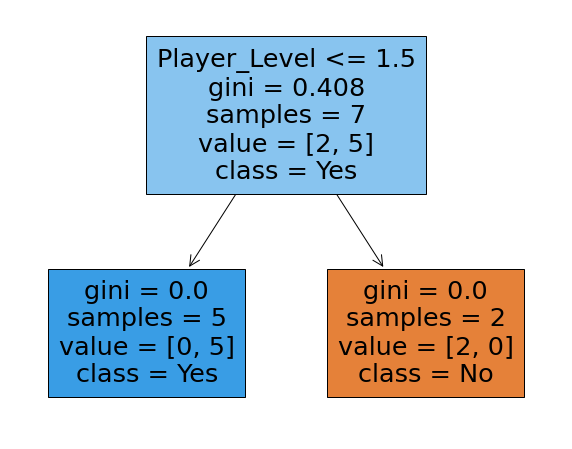

In [8]:

# 7. رسم شجرة القرار
plt.figure(figsize=(10, 8))
tree.plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()


In [9]:

# 8. توقع ما إذا كان اللاعب سيلعب اليوم بناءً على بيانات جديدة
new_data = [[0, 28, 0, 0]]  # Sunny, 28 degrees, Good health, High level
prediction = model.predict(new_data)
print("Will play today" if prediction[0] == 1 else "Will not play today")


Will play today
